# Operations and Inventory Management

**Objective**  
This part is dedicated to Operations and Inventory analysis of tourist accommodations.

**Objective Sprint 1**  
What is the average availability of tourist accommodations in the different terms (30, 60, 90 and 365 days) in each city?

**Description and characteristics of dataset**  
Pre-processed dataframe with tourist accommodations listings.

In [1]:
# import libraries 
import os
import warnings

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings("ignore")

In [2]:
# font sizes
plt.rcParams['figure.titlesize'] = 18 
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['font.size'] = 14             
plt.rcParams['axes.labelsize'] = 14  

plt.rcParams['xtick.labelsize'] = 12      
plt.rcParams['ytick.labelsize'] = 12       
plt.rcParams['legend.fontsize'] = 12

# display settings
#pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', 50)
pd.set_option('display.float_format', '{:.2f}'.format)
 
# set palette
sns.set_palette('Paired')
blue_palette = ['#0d47a1', '#1565c0', '#1976d2', '#1e88e5', '#42a5f5', '#64b5f6', '#90caf9', '#bbdefb']

sns.set_style("darkgrid")

## Data Loading

In [6]:
PATH = 'Data'
FILENAME = f'Tourist_Accommodation24032025.csv'

In [7]:
# define function to read file
def read_file(filename):
    
    """Input: number of sprint.
    Function reads .csv data of desired sprint. 
    Output: Dataframe or error.
    """
    
    # reading file
    try:
        df = pd.read_csv(os.path.join('..', PATH, filename), 
                         parse_dates=['insert_date', 'first_review_date', 'last_review_date'])
        display(df.head())
        return df
    except Exception as error:
        print("An exception occurred:", error)
        return error      

In [8]:
data = read_file(FILENAME)

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date
0,11964,A ROOM WITH A VIEW,Private bedroom in our attic apartment. Right ...,45553,Centro,NaN,Private room,2,2.00,1.00,1.00,"TV,Internet,Wifi,Air conditioning,Elevator,Buz...",400.00,3,365,VERDADERO,7,20,40,130,78,2010-01-02,2017-09-05,970.00,100.00,100.00,100.00,100.00,100.00,100.00,FALSO,75.00,spain,malaga,2018-07-31
1,21853,Bright and airy room,We have a quiet and sunny room with a good vie...,83531,C�rmenes,Latina,Private room,1,1.00,1.00,1.00,"TV,Internet,Wifi,Air conditioning,Kitchen,Free...",170.00,4,40,VERDADERO,0,0,0,162,33,2014-10-10,2018-07-15,920.00,90.00,90.00,100.00,100.00,80.00,90.00,FALSO,52.00,spain,madrid,2020-01-10
2,32347,Explore Cultural Sights from a Family-Friendly...,Open French doors and step onto a plant-filled...,139939,San Vicente,Casco Antiguo,Entire home/apt,4,1.00,2.00,2.00,"TV,Internet,Wifi,Air conditioning,Wheelchair a...",990.00,2,120,VERDADERO,26,31,31,270,148,2011-01-05,2019-07-22,980.00,100.00,100.00,100.00,100.00,100.00,100.00,VERDADERO,142.00,spain,sevilla,2019-07-29
3,35379,Double 02 CasanovaRooms Barcelona,Room at a my apartment. Kitchen and 2 bathroom...,152232,l'Antiga Esquerra de l'Eixample,Eixample,Private room,2,2.00,1.00,1.00,"TV,Internet,Wifi,Kitchen,Breakfast,Elevator,Bu...",400.00,2,730,VERDADERO,9,23,49,300,292,2012-03-13,2020-01-04,940.00,100.00,90.00,100.00,100.00,100.00,90.00,VERDADERO,306.00,spain,barcelona,2020-01-10
4,35801,Can Torras Farmhouse Studio Suite,Lay in bed & watch sunlight change the mood of...,153805,Quart,NaN,Private room,5,1.00,2.00,5.00,"Wifi,Pool,Free parking on premises,Breakfast,P...",900.00,1,180,VERDADERO,0,19,49,312,36,2011-07-08,2018-08-08,970.00,100.00,100.00,100.00,100.00,100.00,100.00,FALSO,39.00,spain,girona,2019-02-19


## Data Overview

In [9]:
# define function to display information about the data
def data_info(df):
   
    """Input: dataframe.
    Function displays basic information, 
    checks for duplicates and NaN. 
    """
    
    # get information about the data
    print(df.info())
    
    # number of unique values for each column
    print()
    print('\033[1mNumber of unique values')
    display(df.nunique())

    # check for NaN
    if df.isna().sum().sum() > 0:
        print()
        print('\033[1mNumber of missing values')
        display(
            pd.DataFrame({'number': df.isna().sum(), 
                          'percentage': df.isna().mean().mul(100)})
            .query('number > 0')
            .sort_values(by='number', ascending=False)
        )
    else:
        print('There are no NaNs in the data\n')
    
    # check for duplicates (without id columns)
    print()
    if df.iloc[:,1:].duplicated().sum() > 0:
        print('Data contain full duplicates\n')
    else:
        print('There are no full duplicates in the data\n')

In [10]:
data_info(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6733 entries, 0 to 6732
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   apartment_id                 6733 non-null   int64         
 1   name                         6730 non-null   object        
 2   description                  6706 non-null   object        
 3   host_id                      6733 non-null   int64         
 4   neighbourhood_name           6733 non-null   object        
 5   neighbourhood_district       4075 non-null   object        
 6   room_type                    6733 non-null   object        
 7   accommodates                 6733 non-null   int64         
 8   bathrooms                    6702 non-null   float64       
 9   bedrooms                     6704 non-null   float64       
 10  beds                         6730 non-null   float64       
 11  amenities_list               6717 non-null 

apartment_id                   6733
name                           6712
description                    6687
host_id                        5238
neighbourhood_name              478
neighbourhood_district           61
room_type                         4
accommodates                     19
bathrooms                        13
bedrooms                         14
beds                             22
amenities_list                 6635
price                           380
minimum_nights                   38
maximum_nights                  129
has_availability                  1
availability_30                  31
availability_60                  61
availability_90                  91
availability_365                366
number_of_reviews               318
first_review_date              1793
last_review_date               1450
review_scores_rating             45
review_scores_accuracy            9
review_scores_cleanliness         8
review_scores_checkin             8
review_scores_communication 


Number of missing values


,number,percentage
neighbourhood_district,2658,39.48
review_scores_value,1289,19.14
review_scores_location,1289,19.14
review_scores_checkin,1288,19.13
review_scores_accuracy,1283,19.06
review_scores_communication,1279,19.00
review_scores_cleanliness,1277,18.97
review_scores_rating,1274,18.92
last_review_date,1204,17.88
first_review_date,1203,17.87



There are no full duplicates in the data



## EDA

In [82]:
df = data[['apartment_id', 'insert_date', 'standardized_city', 'price', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365']] 
df = df.rename(columns={"standardized_city": "city"})

In [83]:
# descriptive statistics
df[['availability_30', 'availability_60', 'availability_90', 'availability_365']].describe().T

,count,mean,std,min,25%,50%,75%,max
availability_30,6733.00,12.29,11.54,0.00,0.00,10.00,24.00,30.00
availability_60,6733.00,27.42,22.48,0.00,2.00,26.00,50.00,60.00
availability_90,6733.00,44.30,33.11,0.00,9.00,46.00,76.00,90.00
availability_365,6733.00,187.39,130.16,0.00,65.00,188.00,316.00,365.00


### has_availability

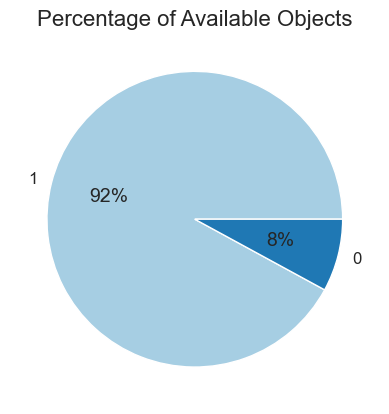

In [84]:
# pieplot
df['has_availability'].value_counts(normalize=True).plot(
    kind='pie',
    wedgeprops = {'linewidth': 1, 'edgecolor': 'white'},
    autopct='%.0f%%')

plt.title('Percentage of Available Objects')
plt.ylabel(None)
plt.show()

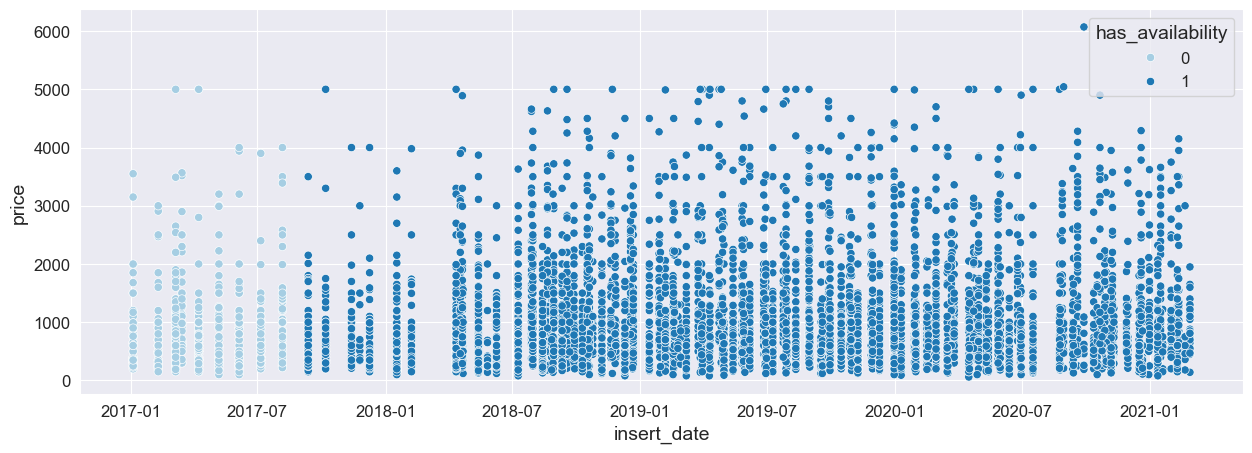

In [85]:
# distribution of has_availability values over time
plt.figure(figsize=(15,5))
sns.scatterplot(data=df, x='insert_date', y='price', hue=df['has_availability'])
plt.show()

### Availability

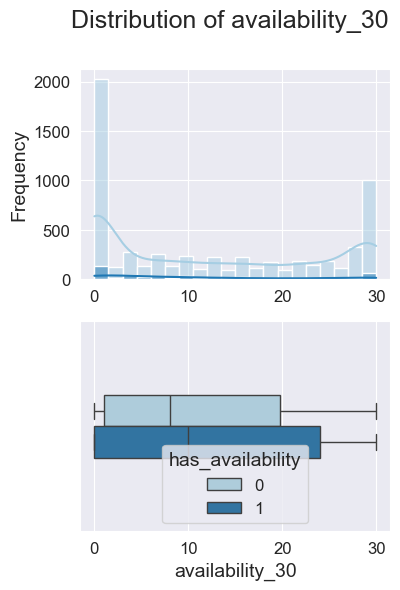

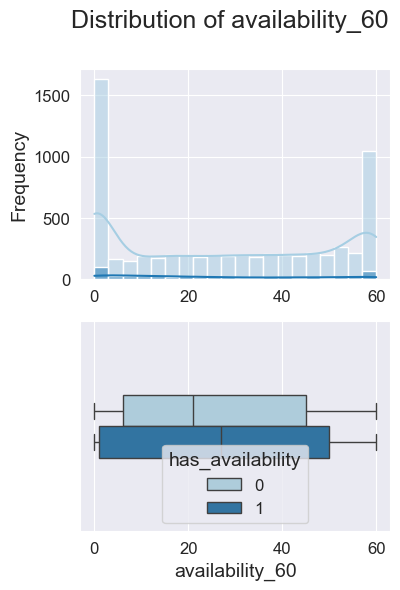

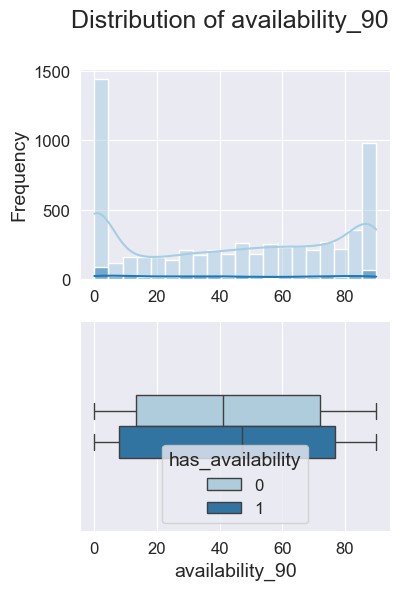

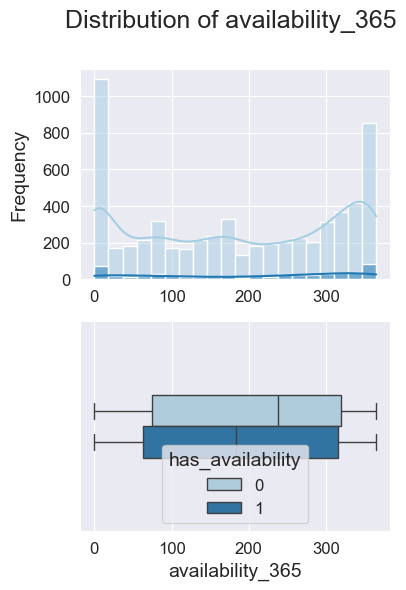

In [87]:
# distribution of nubers of available days in the different terms 
for col in avl_col:
    fig, axs = plt.subplots(2, 1, figsize=(4, 6))
    fig.suptitle(f"Distribution of {col}")
    
    # histogram
    sns.histplot(data=df[df['has_availability'] == 1][col]
                  , kde=True, bins=20
                  , label='available'
                  , ax=axs[0])
    
    (sns.histplot(data=df[df['has_availability'] == 0][col]
                  , kde=True, bins=20
                  , label='non-available'
                  , ax=axs[0])
        .set(xlabel=None, ylabel='Frequency')
    )
    
    # boxplot
    (sns.boxplot(data=df, ax=axs[1], x=col, hue = 'has_availability'
                 , width=0.3, orient='h')
        .set(yticklabels=[], xlabel=col)
    )
    plt.show()

## Buisness Question
What is the average availability of tourist accommodations in the different terms (30, 60, 90 and 365 days) in each city?

In [89]:
# transform dataframe into the long format 
df_long = df.melt(id_vars=['city', 'has_availability'], 
                   value_vars=['availability_30', 'availability_60', 'availability_90', 'availability_365'], 
                   var_name='period', 
                   value_name='availability')

In [91]:
print('Average availability per period, days:')
df_long.groupby('period').availability.mean().round(0)

Average availability per period, days:


period
availability_30     12.00
availability_365   187.00
availability_60     27.00
availability_90     44.00
Name: availability, dtype: float64

[]

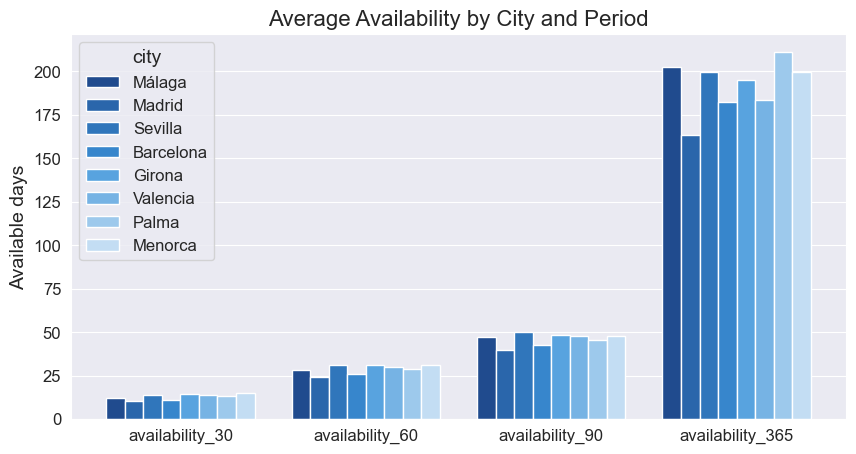

In [93]:
# set palette
sns.set_palette(blue_palette)

plt.figure(figsize=(10, 5))
sns.barplot(data=df_long, x='period', y='availability', hue='city', errorbar=None)
plt.title('Average Availability by City and Period')
plt.ylabel('Available days')
plt.xlabel(None)
plt.plot()

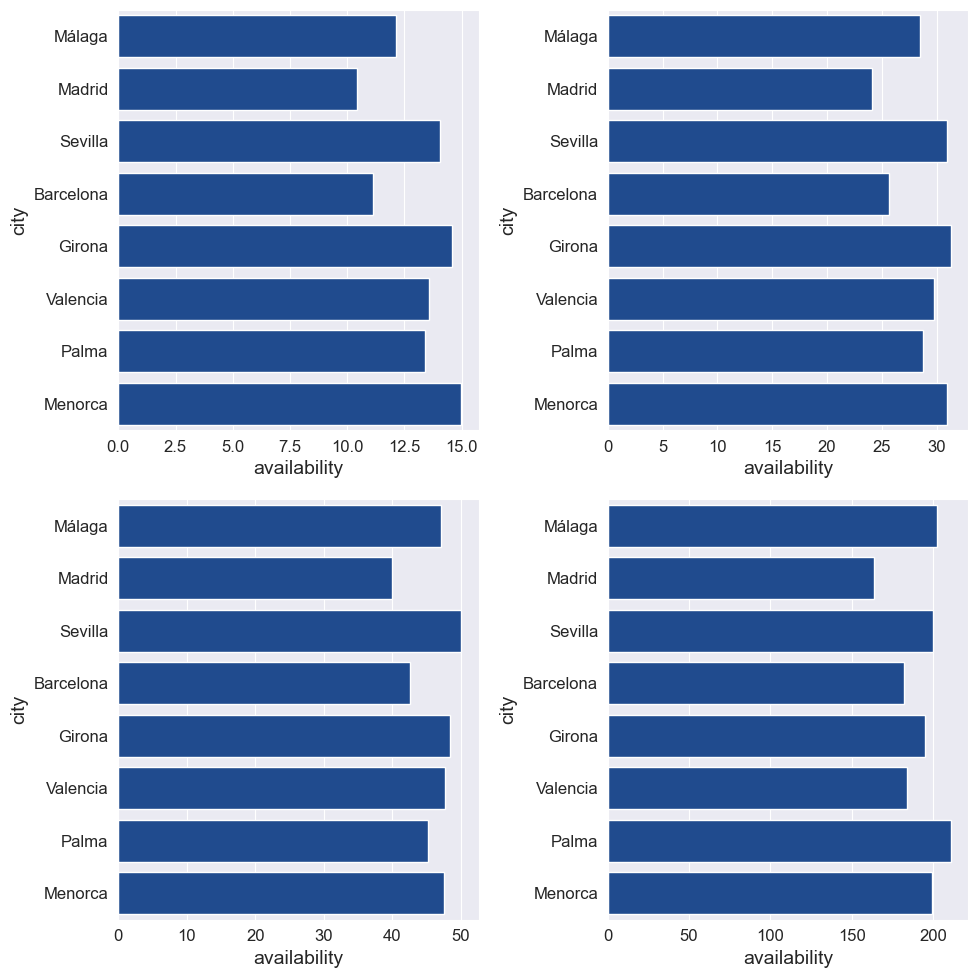

In [100]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
for i,per in enumerate(df_long['period'].unique()):
 
    # boxplots
    row, col = divmod(i, 2)
    #sns.scatterplot(data=df_long.query('period == @per'), x='city', y='availability', 
                    #ax=axs[row, col], size=3, alpha=0.5)
    sns.barplot(data=df_long.query('period == @per'), y='city', x='availability', 
                ax=axs[row, col], errorbar=None)

plt.tight_layout()
plt.show()

## Conclusion and Recommendations

**General Observations:**  
- Peaks at Extremes: many objects show availability clustered around 0 days or near the upper limit of each period (30, 60, 90, 365 days). This suggests that properties are either almost fully booked or have very low booking activity, particularly in shorter periods like 30 days. The longer the period, the fewer properties remain fully booked.
- Average Availability Across Periods: the mean availability follows a consistent trend - on average, properties are available for booking about half of the time within each period. 30 days: 12 available days in average; 60 days: 27 days; 90 days: 44 days; 365 days: ~187 days.

**City-Level Availability Trends**:
- Lowest Availability: Madrid (10, 24, 40, and 164 days for 30, 60, 90, and 365 days, respectively), Barcelona (11, 26, 43, and 182 days)
- Highest Availability: Short-term (30 and 60 days): Girona and Menorca (15 and 31 days, respectively), long-term (365 days): Palma (211 days)

The differences between cities exist but may not be substantively meaningful—especially for shorter time periods. The most notable distinction is in annual availability, where some cities have ~200 days available (Palma, Málaga, Menorca) while others are closer to 160-180 days (Madrid, Barcelona).

It should be noted that differences between cities are not dramatic. The spread of data is relatively high, indicating significant variation in availability within each city, potentially making city-level comparisons less meaningful without deeper statistical testing. Without running statistical tests, it’s possible that differences are due to natural market fluctuations rather than fundamental demand trends.

**Recommendation:** 
- Instead of focusing solely on city differences, analyzing property type, seasonality (high vs. low season) may provide more actionable insights.
- The month in which the data was extracted can significantly impact availability due to seasonality.

## Save Dataframe for Visualization
To visualize the data in Tableau, let's save the processed DataFrame as a `.csv` file.

In [71]:
df.to_csv('data_viz.csv', index=False)